## Supervised Learning Capstone: Diabetic patient readmission prediction

In [598]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as stats
import seaborn as sns
import time

In [559]:
diabetes= pd.read_csv('diabetic_data1.csv')
#preview of dataset
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [560]:
#let's explore data!
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [561]:
diabetes.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [562]:
#looking for nulls
diabetes.isnull().sum()*100/len(diabetes)

encounter_id                0.0
patient_nbr                 0.0
race                        0.0
gender                      0.0
age                         0.0
weight                      0.0
admission_type_id           0.0
discharge_disposition_id    0.0
admission_source_id         0.0
time_in_hospital            0.0
payer_code                  0.0
medical_specialty           0.0
num_lab_procedures          0.0
num_procedures              0.0
num_medications             0.0
number_outpatient           0.0
number_emergency            0.0
number_inpatient            0.0
diag_1                      0.0
diag_2                      0.0
diag_3                      0.0
number_diagnoses            0.0
max_glu_serum               0.0
A1Cresult                   0.0
metformin                   0.0
repaglinide                 0.0
nateglinide                 0.0
chlorpropamide              0.0
glimepiride                 0.0
acetohexamide               0.0
glipizide                   0.0
glyburid

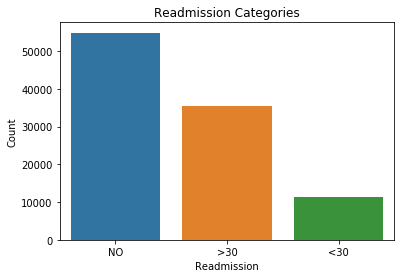

In [563]:
sns.countplot(diabetes.readmitted)
plt.xlabel('Readmission')
plt.ylabel('Count')
plt.title('Readmission Categories')
plt.show()


### For our desired outcome, I choose to predict readmission for patients within 30 days of previous admission.


In [564]:
#creating our target variable
diabetes['target'] = (diabetes.readmitted == '<30').astype('int')

In [565]:
percentage= diabetes.target.sum()*100/len(diabetes)
print('Our target variable is only {0:.2f}% o. This means we have a class imbalance'.format(percentage))

Our target variable is only 11.16% o. This means we have a class imbalance


In [566]:
#We can see that there is a class imbalance, with most of our patients not being readmitted. We will look at this 
#variable in a little while. 

In [567]:
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,target
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,0
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,0


### It's saying there are no null values, but we can see there are '?' values. Let's dig deeper. 

In [568]:
#Let's look at categorical columns first. 
cat_cols= diabetes.select_dtypes(include=['object'])
cat_cols.head()

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),?,?,Pediatrics-Endocrinology,250.83,?,?,None,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),?,?,?,276,250.01,255,None,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),?,?,?,648,250,V27,None,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),?,?,?,8,250.43,403,None,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),?,?,?,197,157,250,None,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [569]:
#looking for ? values.
for col in diabetes.columns:
    if diabetes[col].dtype == object:
         print(col,diabetes[col][diabetes[col] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [570]:
diabetes.race.replace('?', 'Other', inplace=True)
diabetes.race.value_counts()

Caucasian          76099
AfricanAmerican    19210
Other               3779
Hispanic            2037
Asian                641
Name: race, dtype: int64

In [571]:
missing_weight= diabetes[(diabetes.weight=='?')].shape[0]*100/len(diabetes)
missing_payer_code=diabetes[(diabetes.payer_code=='?')].shape[0]*100/len(diabetes)
missing_med_spec=diabetes[(diabetes.medical_specialty=='?')].shape[0]*100/len(diabetes)

print ('Weight has {:2%} missing. Payer code has {:.2%} missing and medical specialty has {:.2%} missing'.format
(missing_weight, missing_payer_code,missing_med_spec))


Weight has 9685.847926% missing. Payer code has 3955.74% missing and medical specialty has 4908.22% missing


In [572]:
#here I'm dropping columns that have plenty of missing values. Weight would have been ideal as 
#demographic variable, unfortunately, 96% of data is missing.
diabetes = diabetes.drop(['medical_specialty','payer_code','weight'],axis=1)

In [573]:
diabetes.gender.value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [574]:
#changed gender value 'Unknown/Invalid' to majority since there were only three missing. 
diabetes.gender.replace('Unknown/Invalid', 'Female', inplace=True)
diabetes.gender.value_counts()

Female    54711
Male      47055
Name: gender, dtype: int64

In [575]:
diabetes.age.value_counts()

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

In [577]:
diabetes.age_group.value_counts()

70    26068
60    22483
50    17256
80    17197
40     9685
30     3775
90     2793
20     1657
10      691
0       161
Name: age_group, dtype: int64

In [578]:
diabetes.max_glu_serum.value_counts()

None    96420
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64

In [579]:
diabetes.A1Cresult.value_counts()

None    84748
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64

In [580]:
#creating new df for list of medications
newdf = diabetes.iloc[0:, 24:47]
newdf['target']=diabetes.target


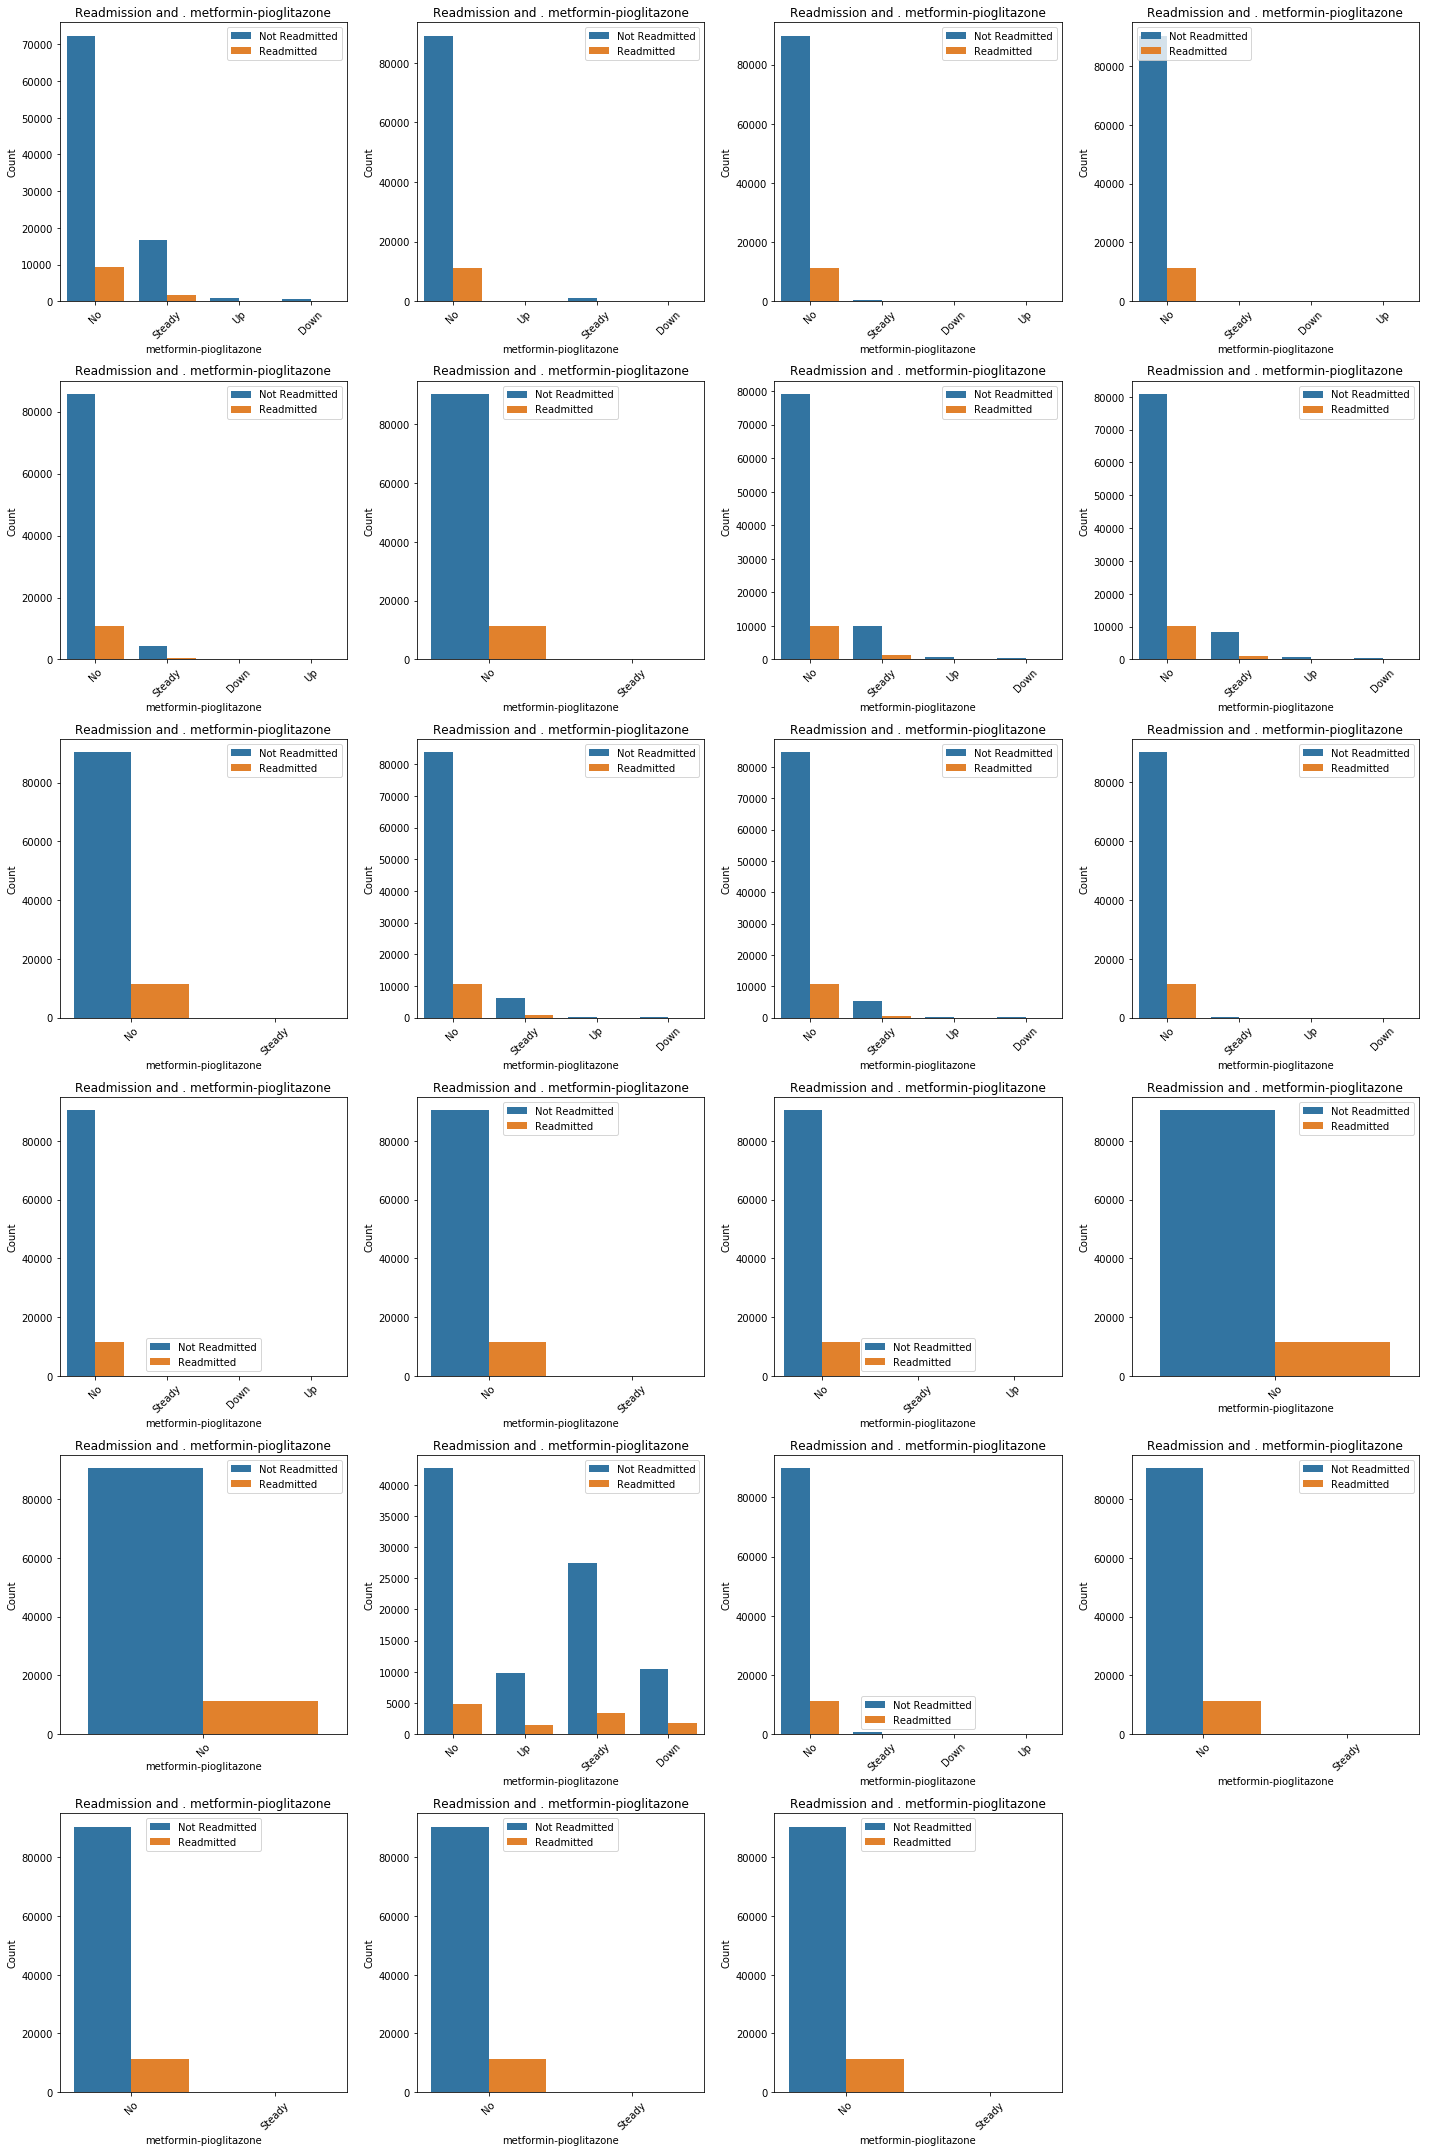

In [382]:
df = newdf.select_dtypes(['object'])

plt.figure(i, figsize=(20, 30))
for i, col in enumerate(df.columns):
    plt.subplot(6,4, i+1)
    sns.countplot(x=col, hue=newdf.target, data=df)      
    plt.title('Readmission and . {}'.format(column))
    plt.ylabel('Count')
    plt.xlabel(column)
    plt.xticks(rotation='45')
    plt.legend(['Not Readmitted','Readmitted'])
plt.tight_layout()
plt.show()

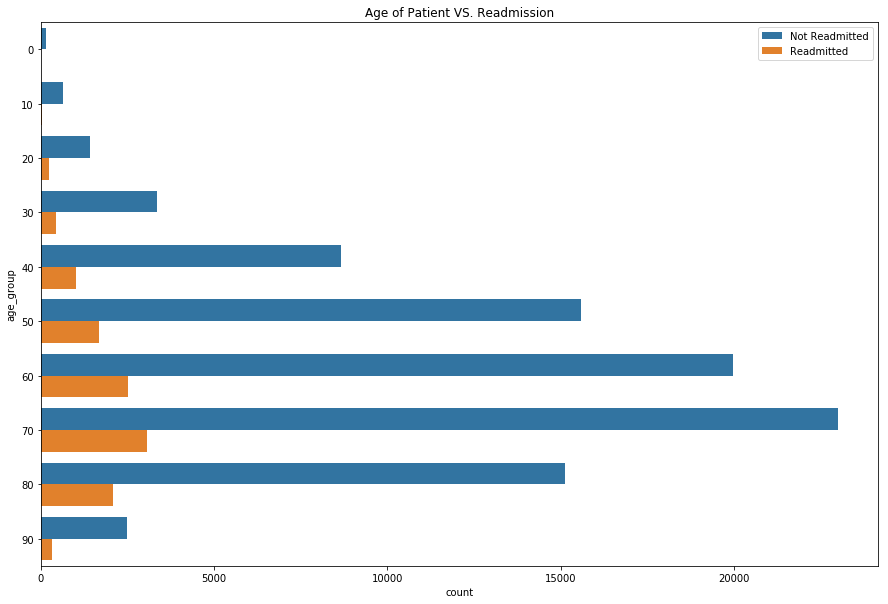

In [581]:
fig = plt.figure(figsize=(15,10))
sns.countplot(y= diabetes['age_group'], hue = diabetes['target']).set_title('Age of Patient VS. Readmission')
plt.legend(['Not Readmitted','Readmitted'])
plt.show()

In [582]:
#created diagnosis df and 
w = pd.DataFrame(diabetes.diag_1.value_counts())
w1 = map(lambda x: x if (x>=250) else 'Other', w['diag_1'])
w1 = pd.DataFrame(w1, columns={'diag_count1'})
w1.set_index(w.index, inplace=True)
diabetes= diabetes.merge(w1, how='left', left_on='diag_1', right_index=True)

In [583]:
w = pd.DataFrame(diabetes.diag_2.value_counts())
w2 = map(lambda x: x if (x>=250) else 'Other', w['diag_2'])
w2 = pd.DataFrame(w2, columns={'diag_count2'})
w2.set_index(w.index, inplace=True)
diabetes= diabetes.merge(w2, how='left', left_on='diag_1', right_index=True)

In [584]:
w = pd.DataFrame(diabetes.diag_3.value_counts())
w3 = map(lambda x: x if (x>=250) else 'Other', w['diag_3'])
w3 = pd.DataFrame(w3, columns={'diag_count3'})
w3.set_index(w.index, inplace=True)
diabetes= diabetes.merge(w3, how='left', left_on='diag_1', right_index=True)

In [585]:
cat_cols = ['race', 'gender', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'diag_count1']
#not here that I've only used diag_count1 for now. Will experiment with secondary diagnosis as well. 

### I want to seperate my numerical values from my categorical values. 

In [586]:
#Let's look at numerical values. 
num_cols= diabetes.select_dtypes(include=['int', 'float'])
num_cols.isnull().sum().sort_values(ascending=False)

age_group                   0
target                      0
number_diagnoses            0
number_inpatient            0
number_emergency            0
number_outpatient           0
num_medications             0
num_procedures              0
num_lab_procedures          0
time_in_hospital            0
admission_source_id         0
discharge_disposition_id    0
admission_type_id           0
patient_nbr                 0
encounter_id                0
dtype: int64

In [587]:
#making sure there is no '?' in variables.
for col in diabetes.columns:
    if diabetes[col].dtype == int:
         print(col,diabetes[col][diabetes[col] == '?'].count())

encounter_id 0
patient_nbr 0
admission_type_id 0
discharge_disposition_id 0
admission_source_id 0
time_in_hospital 0
num_lab_procedures 0
num_procedures 0
num_medications 0
number_outpatient 0
number_emergency 0
number_inpatient 0
number_diagnoses 0
target 0
age_group 0


In [588]:
# I will not use encounter ID and patient_nbr since these are just patient identifiers. 
# I will create seperate features for admission source and type and discharge disposition.

In [589]:
new_num_cols= ['number_diagnoses', 'number_inpatient', 'number_emergency', 'number_outpatient', 'num_medications',
               'num_procedures', 'num_lab_procedures', 'time_in_hospital']

### Based on the seperate file for mapping admission_type_id, discharge_disposition and admission_source_id, there are some patients whose dispositions are expired or are on hospice care. We will drop those since there is no chance of a patient being readmitted.  

In [590]:
diabetes= diabetes.loc[~diabetes.discharge_disposition_id.isin([11,13,14,19,20,21])]

In [591]:
diabetes.discharge_disposition_id.unique()

array([25,  1,  3,  6,  2,  5,  7, 10,  4, 18,  8, 12, 16, 17, 22, 23,  9,
       15, 24, 28, 27])

In [592]:
#I want to create dummy variable for these 3 columns, making them into strings first. 
cols_cat_num = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']

diabetes[cols_cat_num] = diabetes[cols_cat_num].astype('str')


In [593]:
df_cat = pd.get_dummies(diabetes[cat_cols + cols_cat_num ],drop_first = True)
diabetes = pd.concat([diabetes,df_cat], axis = 1)
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,admission_source_id_20,admission_source_id_22,admission_source_id_25,admission_source_id_3,admission_source_id_4,admission_source_id_5,admission_source_id_6,admission_source_id_7,admission_source_id_8,admission_source_id_9
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,0,0,0,0,0,0,0,0,0,0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,0,0,0,0,0,0,0,1,0,0
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,0,0,0,0,0,0,0,1,0,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,0,0,0,0,0,0,0,1,0,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,0,0,0,0,0,0,0,1,0,0


In [445]:
new_age = {'[0-10)':0, 
          '[10-20)':10, 
          '[20-30)':20, 
          '[30-40)':30, 
          '[40-50)':40, 
          '[50-60)':50,
          '[60-70)':60, 
          '[70-80)':70, 
          '[80-90)':80, 
          '[90-100)':90}
diabetes['age_group'] = diabetes.age.replace(new_age)

In [446]:
cols_all_cat = list(df_cat.columns)

In [462]:
extra_feat= ['age_group']
useful_cols = extra_feat + cols_all_cat + new_num_cols
df_data = diabetes[useful_cols + ['target']]

### Splitting data

In [452]:
#shuffle data first to make sure that there is no particular order
df_data = df_data.sample(n = len(df_data), random_state = 42)
df_data = df_data.reset_index(drop = True)

In [453]:
# Save 30% of the data as validation and test data 
df_valid_test=df_data.sample(frac=0.30,random_state=42)
print('Split size: %.3f'%(len(df_valid_test)/len(df_data)))

Split size: 0.300


In [454]:

df_test = df_valid_test.sample(frac = 0.5, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)


In [455]:

# use the rest of the data as training data
df_train_all=df_data.drop(df_valid_test.index)

In [457]:
def calc_prevalence(y_actual):
    return (sum(y_actual)/len(y_actual))
print('Test prevalence(n = %d):%.3f'%(len(df_test),calc_prevalence(df_test.target.values)))
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prevalence(df_valid.target.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), calc_prevalence(df_train_all.target.values)))

Test prevalence(n = 15265):0.109
Valid prevalence(n = 15265):0.111
Train all prevalence(n = 71236):0.112


In [458]:
#making sure all sample was used
print('all samples (n = %d)'%len(df_data))
assert len(df_data) == (len(df_test)+len(df_valid)+len(df_train_all)),'math didnt work'


all samples (n = 101766)


In [460]:
# split the training data into positive and negative
rows_pos = df_train_all.target == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

# merge the balanced data
df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.target.values)))


Train balanced prevalence(n = 16014):0.500


In [461]:
#saving data
df_train_all.to_csv('df_train_all.csv',index=False)
df_train.to_csv('df_train.csv',index=False)
df_valid.to_csv('df_valid.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

In [463]:
X_train = df_train[useful_cols].values
X_train_all = df_train_all[useful_cols].values
X_valid = df_valid[useful_cols].values

y_train = df_train['target'].values
y_valid = df_valid['target'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

Training All shapes: (71236, 194)
Training shapes: (16014, 194) (16014,)
Validation shapes: (15265, 194) (15265,)


In [464]:
#scaling data
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
scaler.fit(X_train_all)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [465]:
import pickle
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [466]:
scaler = pickle.load(open(scalerfile, 'rb'))

In [468]:
#transforming x train and x valid
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

In [470]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity
#setting threshold to 50% since our data is now balanced 
thresh = 0.5


In [472]:
# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train_tf, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='uniform')

In [474]:

y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, \
    knn_train_precision, knn_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
    knn_valid_precision, knn_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

KNN
Training:
AUC:0.643
accuracy:0.599
recall:0.528
precision:0.616
specificity:0.620
prevalence:0.500
 
Validation:
AUC:0.606
accuracy:0.632
recall:0.481
precision:0.147
specificity:0.600
prevalence:0.111
 


In [476]:
# logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [477]:
y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Logistic Regression
Training:
AUC:0.682
accuracy:0.627
recall:0.571
precision:0.643
specificity:0.682
prevalence:0.500
 
Validation:
AUC:0.658
accuracy:0.658
recall:0.555
precision:0.174
specificity:0.671
prevalence:0.111
 


In [479]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_tf, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [480]:
y_train_preds = nb.predict_proba(X_train_tf)[:,1]
y_valid_preds = nb.predict_proba(X_valid_tf)[:,1]

print('Naive Bayes')
print('Training:')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, nb_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Naive Bayes
Training:
AUC:0.522
accuracy:0.514
recall:0.991
precision:0.507
specificity:0.038
prevalence:0.500
 
Validation:
AUC:0.513
accuracy:0.140
recall:0.986
precision:0.113
specificity:0.034
prevalence:0.111
 


In [481]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train_tf, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [482]:
y_train_preds = tree.predict_proba(X_train_tf)[:,1]
y_valid_preds = tree.predict_proba(X_valid_tf)[:,1]

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, tree_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, tree_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Decision Tree
Training:
AUC:0.700
accuracy:0.641
recall:0.556
precision:0.670
specificity:0.716
prevalence:0.500
 
Validation:
AUC:0.637
accuracy:0.676
recall:0.529
precision:0.177
specificity:0.685
prevalence:0.111
 


In [483]:

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [484]:

y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, rf_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Random Forest
Training:
AUC:0.668
accuracy:0.616
recall:0.526
precision:0.641
specificity:0.706
prevalence:0.500
 
Validation:
AUC:0.638
accuracy:0.673
recall:0.496
precision:0.169
specificity:0.695
prevalence:0.111
 


In [486]:

from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [487]:

y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Gradient Boosting Classifier')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, gbc_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, gbc_valid_precision, gbc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Gradient Boosting Classifier
Training:
AUC:0.776
accuracy:0.694
recall:0.678
precision:0.701
specificity:0.711
prevalence:0.500
 
Validation:
AUC:0.631
accuracy:0.614
recall:0.567
precision:0.156
specificity:0.620
prevalence:0.111
 


In [502]:
#looking at important features
feature_importances = pd.DataFrame(lr.coef_[0],index = useful_cols,
                      columns=['importance']).sort_values('importance',
                      ascending=False)

In [503]:
feature_importances.head(10)

,importance
number_inpatient,0.349167
discharge_disposition_id_22,0.189434
repaglinide_No,0.179667
repaglinide_Steady,0.172758
discharge_disposition_id_3,0.127798
number_emergency,0.126593
discharge_disposition_id_28,0.108660
discharge_disposition_id_18,0.104537
diabetesMed_Yes,0.100838
number_diagnoses,0.097242


In [505]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = useful_cols,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [506]:
feature_importances.head(10)

,importance
number_inpatient,0.311111
number_emergency,0.087450
num_medications,0.078727
number_diagnoses,0.049538
num_lab_procedures,0.038866
age_group,0.037734
discharge_disposition_id_3,0.032448
discharge_disposition_id_11,0.024124
discharge_disposition_id_22,0.022934
time_in_hospital,0.022329


### Hyperparameter tuning

In [594]:

from sklearn.model_selection import RandomizedSearchCV

# number of trees
n_estimators = range(200,1000,200)
# maximum number of features to use at each split
max_features = ['auto','sqrt']
# maximum depth of the tree
max_depth = range(1,10,1)
# minimum number of samples to split a node
min_samples_split = range(2,10,2)
# criterion for evaluating a split
criterion = ['gini','entropy']

# random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'criterion':criterion}

print(random_grid)

{'n_estimators': range(200, 1000, 200), 'max_features': ['auto', 'sqrt'], 'max_depth': range(1, 10), 'min_samples_split': range(2, 10, 2), 'criterion': ['gini', 'entropy']}


In [595]:

from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)

In [600]:
# create the randomized search cross-validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 20, cv = 5, scoring=auc_scoring,
                               verbose = 1, random_state = 42)

In [601]:
# fit the random search model (this will take a few minutes)
t1 = time.time()
rf_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  9.3min finished


567.2847239971161


In [603]:
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Baseline Random Forest')
rf_train_auc_base = roc_auc_score(y_train, y_train_preds)
rf_valid_auc_base = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(rf_train_auc_base))
print('Validation AUC:%.3f'%(rf_valid_auc_base))

print('Optimized Random Forest')
y_train_preds_random = rf_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = rf_random.best_estimator_.predict_proba(X_valid_tf)[:,1]

rf_train_auc = roc_auc_score(y_train, y_train_preds_random)
rf_valid_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(rf_train_auc))
print('Validation AUC:%.3f'%(rf_valid_auc))

Baseline Random Forest
Training AUC:0.668
Validation AUC:0.638
Optimized Random Forest
Training AUC:0.717
Validation AUC:0.663


In [ ]:
#optimize gradient booster classifier
# number of trees
n_estimators = range(100,500,100)

# maximum depth of the tree
max_depth = range(1,5,1)

# learning rate
learning_rate = [0.001,0.01,0.1]

# random grid

random_grid_gbc = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'learning_rate':learning_rate}

# create the randomized search cross-validation
gbc_random = RandomizedSearchCV(estimator = gbc, param_distributions = random_grid_gbc,
                                n_iter = 20, cv = 2, scoring=auc_scoring,
                                verbose = 0, random_state = 42)

t1 = time.time()
gbc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

In [ ]:

y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Baseline Gradient Boosting Classifier')
gbc_train_auc_base = roc_auc_score(y_train, y_train_preds)
gbc_valid_auc_base = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(gbc_train_auc_base))
print('Validation AUC:%.3f'%(gbc_valid_auc_base))

print('Optimized gbc')
y_train_preds_random = gbc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = gbc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
gbc_train_auc = roc_auc_score(y_train, y_train_preds_random)
gbc_valid_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(gbc_train_auc))
print('Validation AUC:%.3f'%(gbc_valid_auc))

### Model on test evaluation

In [ ]:

X_test = df_test[useful_cols].values
y_test = df_test['target'].values

scaler = pickle.load(open('scaler.sav', 'rb'))
X_test_tf = scaler.transform(X_test)